In [1]:
import csv
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,stat_summary,theme_bw
from plotnine import ggplot, aes, geom_bar, coord_flip,labs
from plotnine import *
import numpy as np
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import math

In [26]:
import ipywidgets
from mizani.formatters import comma_format

In [2]:
df = pd.read_csv('madrid_transactions_country.csv', delimiter=';', skiprows=0, low_memory=False)

In [6]:
cat_list = df['category'].value_counts().index.tolist()
df_cat = pd.Categorical(df['category'], categories=cat_list)

df2 = df.assign(df_cat = df_cat)

In [3]:
df.columns

Index(['Unnamed: 0', 'amount', 'category', 'customer_country', 'daytime',
       'hour', 'tx_date_proc', 'weekday', 'Date_new ', 'numericcode',
       'latitude(average)', 'longitude(average)', 'country_name', 'alpha-3',
       'country_code', 'iso_3166-2', 'region', 'sub_region', 'GDP_USD_2012',
       'GDP per capita (constant 2015 US$)',
       'GDP, PPP (current international $)', 'GDP growth (annual %) ',
       'Income_classification1 ', 'PPP_2012',
       'Gross domestic income (constant LCU)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'Income_classification ',
       'GNI per capita, PPP (current international $)'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Date_new,numericcode,...,GDP_USD_2012,GDP per capita (constant 2015 US$),"GDP, PPP (current international $)",GDP growth (annual %),Income_classification1,PPP_2012,Gross domestic income (constant LCU),Adjusted net national income per capita (constant 2015 US$),Income_classification,"GNI per capita, PPP (current international $)"
0,1,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday,01.03.12 21:51,826,...,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,High income,38120
1,2,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday,02.03.12 16:12,826,...,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,High income,38120
2,3,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday,02.03.12 17:34,156,...,8532229986994,6592,1.512454e+13,7.863736,Upper middle income,3.56,..,4997,Upper middle income,11140
3,4,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday,01.03.12 17:43,826,...,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,High income,38120
4,5,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday,01.03.12 22:47,208,...,327148943812,51567,2.505246e+11,0.226500,High income,7.56,1909813185266,42430,High income,45820


In [5]:
df.describe()

,Unnamed: 0,amount,hour,latitude(average),longitude(average),country_code,GDP_USD_2012,GDP per capita (constant 2015 US$),"GDP, PPP (current international $)",GDP growth (annual %),"GNI per capita, PPP (current international $)"
count,10793.000000,10793.000000,10793.000000,10781.000000,10782.000000,10793.000000,1.079300e+04,10793.000000,1.070600e+04,10793.000000,10793.000000
mean,5397.000000,108.735644,15.032428,36.377767,-2.871369,480.415084,4.066684e+12,34111.388770,4.411083e+12,1.678976,35716.519040
std,3115.815062,310.303331,4.809074,23.721422,67.542173,285.287340,5.548015e+12,19608.625647,5.871824e+12,2.622192,16638.373106
min,1.000000,0.040000,0.000000,-41.000000,-172.333300,0.000000,7.605496e+08,362.000000,0.000000e+00,-7.086697,0.000000
25%,2699.000000,19.900000,12.000000,35.000000,-64.000000,250.000000,4.985236e+11,12986.000000,4.697206e+11,0.313135,20620.000000
50%,5397.000000,39.990000,16.000000,42.500000,2.000000,410.000000,2.086958e+12,36183.000000,2.172384e+12,1.762223,38500.000000
75%,8095.000000,92.680000,18.000000,52.500000,25.000000,818.000000,2.719158e+12,48886.000000,3.480299e+12,2.402531,46500.000000
max,10793.000000,15000.000000,23.000000,65.000000,174.000000,882.000000,1.625397e+13,104488.000000,1.625397e+13,16.665429,132440.000000


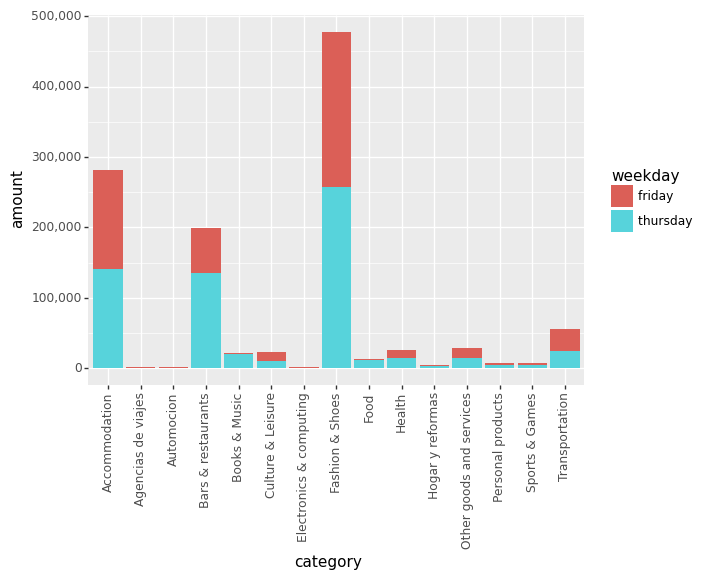

In [28]:
(ggplot(data=df.dropna(), mapping=aes(x='category', y= 'amount', fill='weekday')) +
geom_col() +
scale_y_continuous(labels=comma_format()) +
theme(axis_text_x=element_text(rotation=90))).draw();